<a href="https://colab.research.google.com/github/cooeoeooc/2178_g38/blob/main/group38_code_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [290]:
import pandas as pd
import numpy as np

In [291]:
np.random.seed(123)

# Data Preprocessing and Cleaning

In [292]:
data = pd.read_csv("https://raw.githubusercontent.com/cooeoeooc/2178_g38/main/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
data.head(5)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [293]:
def test_na_num(df):
    for column in df:
        print(sum(df[column].isna()), column)

In [294]:
test_na_num(data)

0 Arrest_Year
0 Arrest_Month
0 EventID
469 ArrestID
0 PersonID
4 Perceived_Race
0 Sex
24 Age_group__at_arrest_
0 Youth_at_arrest__under_18_years
0 ArrestLocDiv
0 StripSearch
0 Booked
165 Occurrence_Category
0 Actions_at_arrest___Concealed_i
0 Actions_at_arrest___Combative__
0 Actions_at_arrest___Resisted__d
0 Actions_at_arrest___Mental_inst
0 Actions_at_arrest___Assaulted_o
0 Actions_at_arrest___Cooperative
57475 SearchReason_CauseInjury
57475 SearchReason_AssistEscape
57475 SearchReason_PossessWeapons
57475 SearchReason_PossessEvidence
57475 ItemsFound
0 ObjectId


In [295]:
data = data.dropna(subset = ["ArrestID", "Perceived_Race", "Age_group__at_arrest_", "Occurrence_Category"])

In [296]:
data = data.drop(["EventID", "ArrestID", "ArrestLocDiv"], axis = 1)

Cleaning existing variables. 

In [297]:
data["Age_group_clean"] = data["Age_group__at_arrest_"].replace({"Aged 17 years and younger": "Aged 17 years and under", "Aged 65 and older": "Aged 65 years and older"})

Establishing exclusion criteria – based on popular Occurrence Categories. 

In [298]:
data["Occurrence_Category"].value_counts() # seeing most popular categories

occurrence_replacement_dict = {"Assault": 0, 
                              "Assault & Other crimes against persons": 1, 
                              "Robbery & Theft": 2, 
                              "Robbery/Theft": 2, 
                              "Warrant": 3, 
                              "FTA/FTC/Compliance Check/Parollee": 4, 
                              "FTA/FTC, Compliance Check & Parollee": 4, 
                              "Police Category - Administrative": 5, 
                              "Drug Related": 6} # should we add more categories?

data["Occurrence_Category"] = data["Occurrence_Category"].replace(occurrence_replacement_dict)
data["Occurrence_Category"] = data["Occurrence_Category"].where(data["Occurrence_Category"].isin(list(occurrence_replacement_dict.values())) == True, 7)

Creating new variables. 

In [299]:
data["SearchReasonCount"] = data["SearchReason_CauseInjury"] + data["SearchReason_AssistEscape"] + data["SearchReason_PossessWeapons"] + data["SearchReason_PossessEvidence"]
data["SearchReasonCount"] = np.where(data["SearchReasonCount"].isna() == True, 0, data["SearchReasonCount"])

In [300]:
data["UncooperativeActionsCount"] = data["Actions_at_arrest___Concealed_i"] + data["Actions_at_arrest___Combative__"] + data["Actions_at_arrest___Resisted__d"] + data["Actions_at_arrest___Mental_inst"] + data["Actions_at_arrest___Assaulted_o"]

In [301]:
data["Time_series"] = np.where((data["Arrest_Year"] == 2020) & (data["Arrest_Month"] == "Jan-Mar"), 1, 
                               (np.where((data["Arrest_Year"] == 2020) & (data["Arrest_Month"] == "Apr-June"), 2, 
                                         (np.where((data["Arrest_Year"] == 2020) & (data["Arrest_Month"] == "July-Sept"), 3, 
                                                   (np.where((data["Arrest_Year"] == 2020) & (data["Arrest_Month"] == "Oct-Dec"), 4, 
                                                             (np.where((data["Arrest_Year"] == 2021) & (data["Arrest_Month"] == "Jan-Mar"), 5, 
                                                                       (np.where((data["Arrest_Year"] == 2021) & (data["Arrest_Month"] == "Apr-June"), 6, 
                                                                                 (np.where((data["Arrest_Year"] == 2021) & (data["Arrest_Month"] == "July-Sept"), 7, 
                                                                                           (np.where((data["Arrest_Year"] == 2021) & (data["Arrest_Month"] == "Oct-Dec"), 8, 0)))))))))))))))

In [302]:
data["Race_White"] = np.where(data["Perceived_Race"] == "White", 1, 0)

In [303]:
test_na_num(data)

0 Arrest_Year
0 Arrest_Month
0 PersonID
0 Perceived_Race
0 Sex
0 Age_group__at_arrest_
0 Youth_at_arrest__under_18_years
0 StripSearch
0 Booked
0 Occurrence_Category
0 Actions_at_arrest___Concealed_i
0 Actions_at_arrest___Combative__
0 Actions_at_arrest___Resisted__d
0 Actions_at_arrest___Mental_inst
0 Actions_at_arrest___Assaulted_o
0 Actions_at_arrest___Cooperative
57284 SearchReason_CauseInjury
57284 SearchReason_AssistEscape
57284 SearchReason_PossessWeapons
57284 SearchReason_PossessEvidence
57284 ItemsFound
0 ObjectId
0 Age_group_clean
0 SearchReasonCount
0 UncooperativeActionsCount
0 Time_series
0 Race_White


In [304]:
data.head(5)

,Arrest_Year,Arrest_Month,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,StripSearch,Booked,Occurrence_Category,...,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Age_group_clean,SearchReasonCount,UncooperativeActionsCount,Time_series,Race_White
0,2020,July-Sept,326622,White,M,Aged 35 to 44 years,Not a youth,0,1,1,...,NaN,NaN,NaN,NaN,1,Aged 35 to 44 years,0.0,0,3,1
1,2020,July-Sept,326622,White,M,Aged 35 to 44 years,Not a youth,0,1,1,...,NaN,NaN,NaN,NaN,2,Aged 35 to 44 years,0.0,0,3,1
2,2020,Oct-Dec,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,0,1,1,...,NaN,NaN,NaN,NaN,3,Aged 35 to 44 years,0.0,0,4,0
3,2021,Jan-Mar,327535,Black,M,Aged 25 to 34 years,Not a youth,0,0,7,...,NaN,NaN,NaN,NaN,4,Aged 25 to 34 years,0.0,0,5,0
4,2021,Jan-Mar,327535,South Asian,M,Aged 25 to 34 years,Not a youth,0,1,4,...,NaN,NaN,NaN,NaN,5,Aged 25 to 34 years,0.0,0,5,0


In [305]:
data = data.drop(["PersonID", "Age_group__at_arrest_", "Booked", "ObjectId"], axis = 1)

# EDA

## Visualizations

In [306]:
import matplotlib.pyplot as plt

In [307]:
StripSearch_1_data = data[data["StripSearch"] == 1]

In [308]:
data["Age_group_clean"].value_counts().sort_index(ascending = True)

Aged 17 years and under     3012
Aged 18 to 24 years         9934
Aged 25 to 34 years        20725
Aged 35 to 44 years        16072
Aged 45 to 54 years         9003
Aged 55 to 64 years         4553
Aged 65 years and older     1316
Name: Age_group_clean, dtype: int64

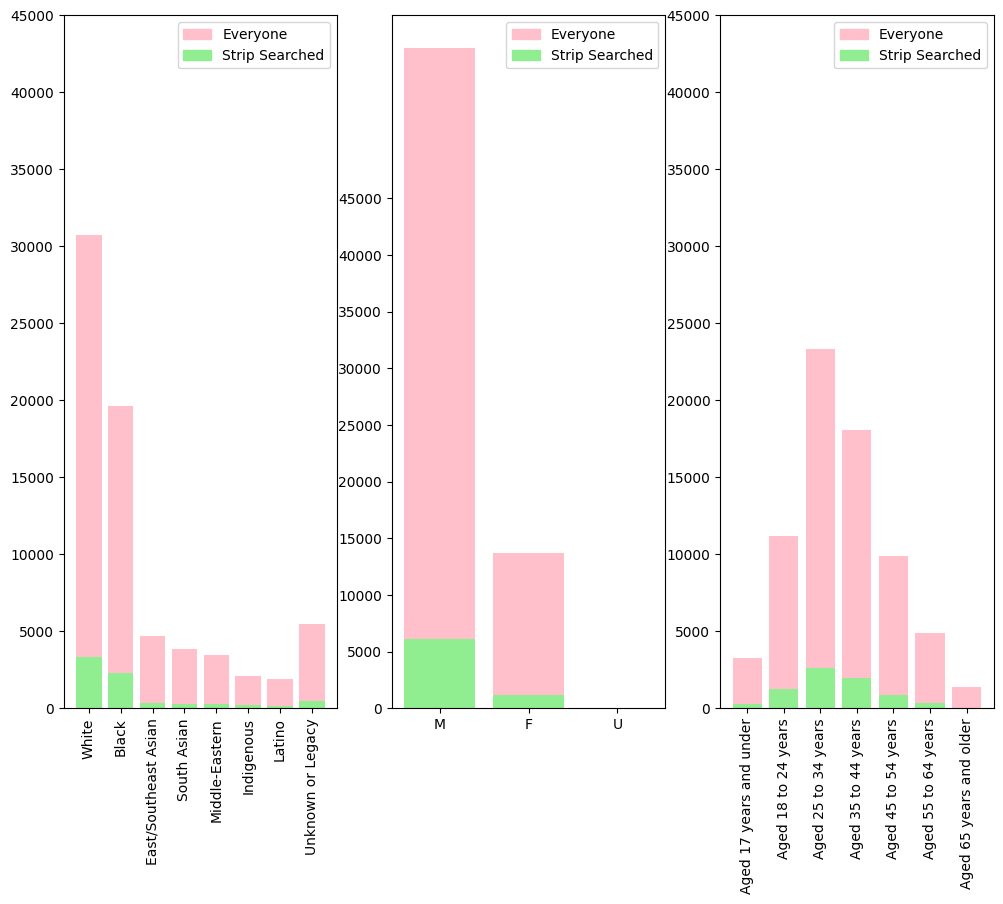

In [309]:
plt.figure(figsize=(12,9))

colours = {"Everyone": "pink", "Strip Searched": "lightgreen"}
labels = list(colours.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color = colours[label]) for label in labels]

plt.subplot(1, 3, 1) # strip searches by perceived race
races = data["Perceived_Race"].value_counts().index.tolist()
legacy = races.pop(2)
races.append(legacy)

race_counts = data["Perceived_Race"].value_counts().values.tolist()
legacy = race_counts.pop(2)
race_counts.append(legacy)

stripsearch_race_counts = StripSearch_1_data["Perceived_Race"].value_counts().values.tolist()
legacy = stripsearch_race_counts.pop(2)
stripsearch_race_counts.append(legacy)

plt.bar(races, race_counts, bottom = stripsearch_race_counts, color = "pink")
plt.bar(races, stripsearch_race_counts, color = "lightgreen")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 50000, 5000))
plt.legend(handles, labels)

plt.subplot(1, 3, 2) # strip searches by sex
sexes = data["Sex"].value_counts().index.tolist()
sex_counts = data["Sex"].value_counts().values.tolist()

stripsearch_sex_counts = StripSearch_1_data["Sex"].value_counts().values.tolist()
stripsearch_sex_counts.append(0)

plt.bar(sexes, sex_counts, bottom = stripsearch_sex_counts, color = "pink")
plt.bar(sexes, stripsearch_sex_counts, color = "lightgreen")
plt.yticks(np.arange(0, 50000, 5000))
plt.legend(handles, labels)

plt.subplot(1, 3, 3) # strip searches by age
ages = data["Age_group_clean"].value_counts().index.tolist()
reordered_1 = ages.pop(ages.index("Aged 17 years and under"))
reordered_2 = ages.pop(ages.index("Aged 18 to 24 years"))
ages.insert(0, reordered_1)
ages.insert(1, reordered_2)

age_counts = data["Age_group_clean"].value_counts().sort_index(ascending = True).values.tolist()

stripsearch_age_counts = StripSearch_1_data["Age_group_clean"].value_counts().sort_index(ascending = True).values.tolist()

plt.bar(ages, age_counts, bottom = stripsearch_age_counts, color = "pink")
plt.bar(ages, stripsearch_age_counts, color = "lightgreen")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 50000, 5000))
plt.legend(handles, labels)

Text(0, 0.5, 'Number of Strip Searches Booked')

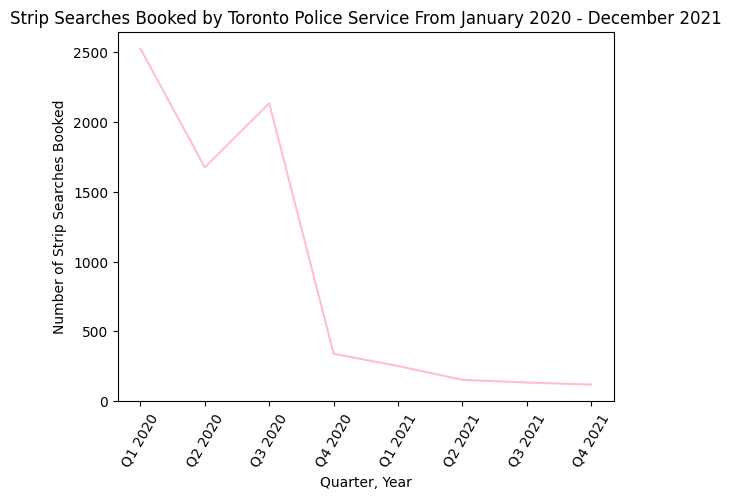

In [310]:
StripSearch_1_data.groupby(["Time_series"])["StripSearch"].value_counts()
StripSearch_1_data.groupby(["Time_series"])["StripSearch"].value_counts().sort_index(ascending = True).plot(color = "pink")
plt.title("Strip Searches Booked by Toronto Police Service From January 2020 - December 2021")
axes = plt.gca()
axes.set_xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7])
axes.set_xticklabels(["Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020", "Q1 2021", "Q2 2021", "Q3 2021", "Q4 2021"])
plt.xticks(rotation = 60)
plt.xlabel("Quarter, Year")
plt.ylabel("Number of Strip Searches Booked")

Text(0, 0.5, 'Number of Strip Searches Booked')

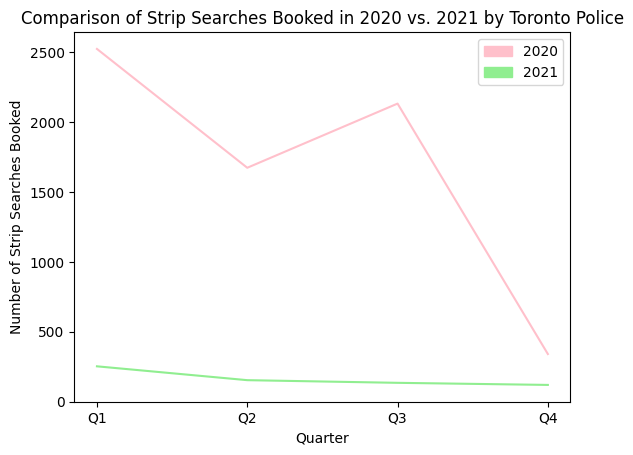

In [311]:
StripSearch_1_2020_data = data[(data["Arrest_Year"] == 2020) & (data["StripSearch"] == 1)]
StripSearch_1_2021_data = data[(data["Arrest_Year"] == 2021) & (data["StripSearch"] == 1)]

plt1 = StripSearch_1_2020_data.groupby(["Time_series"])["StripSearch"].value_counts().sort_index(ascending = True).plot(color = "pink")
plt2 = StripSearch_1_2021_data.groupby(["Time_series"])["StripSearch"].value_counts().sort_index(ascending = True).plot(color = "lightgreen")
plt_axes = plt.gca()
plt_axes.set_xticks([0, 1, 2, 3])
plt_axes.set_xticklabels(["Q1", "Q2", "Q3", "Q4"])

colours = {"2020": "pink", "2021": "lightgreen"}
labels = list(colours.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color = colours[label]) for label in labels]
plt.legend(handles, labels)

plt.title("Comparison of Strip Searches Booked in 2020 vs. 2021 by Toronto Police")
plt.xlabel("Quarter")
plt.ylabel("Number of Strip Searches Booked")

## t-tests

# Feature Engineering

## Numerical representation

In [312]:
race_dict = {"White": 0,
             "Unknown or Legacy": 1,
             "Black":2,
             "South Asian":3,
             "Indigenous":4,
             "Middle-Eastern":5, 
             "Latino": 6,
             "East/Southeast Asian":7}

data['Perceived_Race'] = data['Perceived_Race'].replace(race_dict)

In [313]:
sex_dict= {'M':0,'F':1,'U':2}

data['Sex'] = data['Sex'].replace(sex_dict)

In [314]:
age_dict={'Aged 17 years and under': 0,
          'Aged 18 to 24 years': 1,
          'Aged 25 to 34 years': 2,
          'Aged 35 to 44 years': 3,
          'Aged 45 to 54 years': 4,
          'Aged 55 to 64 years': 5,
          'Aged 65 years and older': 6,
          }

data['Age_group_clean'] = data['Age_group_clean'].replace(age_dict)

In [315]:
youth_dict={'Youth (aged 17 and younger)': 0,
            'Youth (aged 17 years and under)': 0, 
            'Not a youth': 1}

data['Youth_at_arrest__under_18_years'] = data['Youth_at_arrest__under_18_years'].replace(youth_dict)

In [316]:
data = data.dropna()

## One-hot encoding

In [317]:
categorical = data.columns.tolist()
categorical.pop(categorical.index("Youth_at_arrest__under_18_years"))
categorical.pop(categorical.index("StripSearch"))
categorical.pop(categorical.index("Actions_at_arrest___Concealed_i"))
categorical.pop(categorical.index("Actions_at_arrest___Combative__"))
categorical.pop(categorical.index("Actions_at_arrest___Resisted__d"))
categorical.pop(categorical.index("Actions_at_arrest___Mental_inst"))
categorical.pop(categorical.index("Actions_at_arrest___Assaulted_o"))
categorical.pop(categorical.index("Actions_at_arrest___Cooperative"))
categorical.pop(categorical.index("SearchReason_CauseInjury"))
categorical.pop(categorical.index("SearchReason_AssistEscape"))
categorical.pop(categorical.index("SearchReason_PossessWeapons"))
categorical.pop(categorical.index("SearchReason_PossessEvidence"))
categorical.pop(categorical.index("ItemsFound"))
categorical.pop(categorical.index("SearchReasonCount"))
categorical.pop(categorical.index("UncooperativeActionsCount"))
categorical.pop(categorical.index("Race_White"))

onehot_data = pd.DataFrame()

for feature in categorical: 
  onehot_feature = pd.get_dummies(data[feature])
  onehot_data = pd.concat([onehot_data, onehot_feature], axis = 1)

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [318]:
categorical

['Arrest_Year',
 'Arrest_Month',
 'Perceived_Race',
 'Sex',
 'Occurrence_Category',
 'Age_group_clean',
 'Time_series']

In [319]:
onehot_data.head(5) # onehot encoding was successful

,2020,2021,Apr-June,Jan-Mar,July-Sept,Oct-Dec,0,1,2,3,...,5,6,1,2,3,4,5,6,7,8
12,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
33,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
38,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
42,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


# Power Analysis

Calculating sample sizes needed to observe a statistically significant effect at Cohen's d = {0.2, 0.5, 0.8}. 

In [326]:
import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt

power_analysis = smp.TTestIndPower()
sample_size_small_es = power_analysis.solve_power(effect_size=0.2, power=0.8, alpha=0.05)
sample_size_med_es = power_analysis.solve_power(effect_size=0.5, power=0.8, alpha=0.05)
sample_size_large_es = power_analysis.solve_power(effect_size=0.8, power=0.8, alpha=0.05)

sample_sizes = [["For small effect size (d = 0.2)", "For medium effect size (d = 0.5)", "For large effect size (d = 0.8)"], 
                [sample_size_small_es, sample_size_med_es, sample_size_large_es]]

sample_sizes_df = pd.DataFrame(sample_sizes[1:], columns = sample_sizes[0])
sample_sizes_df

/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,For small effect size (d = 0.2),For medium effect size (d = 0.5),For large effect size (d = 0.8)
0,393.405693,63.765611,25.524572
